In [4]:
import pandas as pd
import requests

rota '/estoque'<br>
ef rota_estoque(input_file):

importaÃ§Ã£o da contagem de estoque

In [5]:
input_file='../data/estoque.xlsx'

In [16]:
estoque = pd.read_excel(input_file).T.set_index(
    0).dropna(axis=0, how='all').T
estoque.drop(['ESTOQUE'], axis=1, inplace=True)
estoque.columns = ['nome', 'estoque']
estoque['estoque'] = pd.to_numeric(estoque['estoque'], errors='coerce')
estoque.dropna(inplace=True)
estoque

,nome,estoque
1,ALCATRA C/QJO,3.452
2,ANCHO MONTANA,6.465
3,ASSADO DE TIRAS,0.668
4,ASINHA RECHEADA,6.000
5,CARVÃO 10KG,0.000
6,CARVÃO 3KG,23.000
7,CHORIZO EST.92,8.450
8,CORAÇÃO,2.000
9,COSTELA BBQ,5.000
10,COXINHA,4.000


listagem de produtos tiny API

In [67]:
produtos_id = list()
data = {
    'formato': 'json',
    'token': '2b6fc7102240cedcc9166c43921ea73eea82b876',
    'pagina': 1
}
while True:
    try:
        produtos_id += [x['produto'] for x in requests.post(
            'https://api.tiny.com.br/api2/produtos.pesquisa.php', data).json()['retorno']['produtos']]
        data['pagina'] += 1
    except:
        break
produtos_id = pd.DataFrame(produtos_id)
produtos_lista = produtos_id.copy()
produtos_id = produtos_id.T.reindex(['id', 'nome']).T
produtos_id = estoque.merge(produtos_id)

requisiÃ§Ã£o de dados completos do produto tiny API

In [10]:
produtos_completos = [requests.post('https://api.tiny.com.br/api2/produto.obter.php', {
                                    'formato': 'json', 'token': '2b6fc7102240cedcc9166c43921ea73eea82b876', 'id': x}).json()['retorno']['produto'] for x in produtos_id['id']]
produtos_completos = pd.DataFrame(produtos_completos).drop(['preco', 'preco_promocional', 'ncm', 'origem', 'gtin', 'gtin_embalagem', 'localizacao', 'peso_liquido', 'peso_bruto', 'estoque_maximo', 'id_fornecedor', 'codigo_fornecedor', 'codigo_pelo_fornecedor', 'unidade_por_caixa', 'preco_custo', 'preco_custo_medio', 'situacao', 'tipo', 'classe_ipi', 'valor_ipi_fixo', 'cod_lista_servicos',
                                                            'descricao_complementar', 'garantia', 'cest', 'obs', 'tipoVariacao', 'variacoes', 'idProdutoPai', 'sob_encomenda', 'dias_preparacao', 'tipoEmbalagem', 'alturaEmbalagem', 'comprimentoEmbalagem', 'larguraEmbalagem', 'diametroEmbalagem', 'categoria', 'anexos', 'imagens_externas', 'classe_produto', 'seo_title', 'seo_keywords', 'link_video', 'seo_description'], axis=1)

formataÃ§Ã£o final para /produtos

In [11]:
produtos_formatados = produtos_completos
produtos_formatados['unidade'] = produtos_formatados['unidade'].str.casefold()
produtos_formatados['unidade'] = [
    'kg' if 'kg' in x else 'un' for x in produtos_formatados['unidade']]
produtos_formatados['cotacao'] = 0
produtos_formatados['disponivel'] = False
produtos_formatados['quantidade'] = 0
produtos_formatados['valorfinal'] = 0
produtos_formatados['estoque'] = produtos_id['estoque']

# Bugfix

In [177]:
produtos_out = estoque.set_index('nome').drop(produtos_inner['nome'].to_list()).reset_index()
produtos_out

,nome,estoque
0,ALCATRA C/QJO,3.452
1,ANCHO MONTANA,6.465
2,ASSADO DE TIRAS,0.668
3,CARVÃO 10KG,0.000
4,CARVÃO 3KG,23.000
5,CHORIZO EST.92,8.450
6,COSTELA BBQ,5.000
7,COXINHA,4.000
8,DENVER STEAK CARA PRETA,1.010
9,FRALDÃO URUGUAIO,0.000


In [131]:
ratios = dict()

for x in produtos_out:
    ratios[x] = dict()
    for y in produtos_all:
        ratios[x][y] = fuzz.ratio(x,y)

similars = pd.DataFrame(ratios)


,ALCATRA C/QJO,ANCHO MONTANA,ASSADO DE TIRAS,CARVÃO 10KG,CARVÃO 3KG,CHORIZO EST.92,COSTELA BBQ,COXINHA,DENVER STEAK CARA PRETA,FRALDÃO URUGUAIO,...,PICANHA CIA CARNE,PICANHA CRU. DO SUL,PICANHA SAUDALI,PICANHA TACUAREMBO,PICOLE MINEIRO,PORCHETA,POTERHOUSE,SALSICHÃO C/QJO,SOBRECOXA,TIBONE
ADICIONAIS EVENTO,33,33,38,29,30,39,28,33,20,36,...,24,28,25,34,39,24,22,38,15,35
ALCATRA COM QUEIJO,77,32,30,34,36,25,20,24,34,41,...,34,38,36,44,38,15,21,48,22,25
ALMÔNDEGA BACON,43,36,33,15,16,14,30,27,26,26,...,38,35,33,42,21,9,8,27,25,29
ALMÔNDEGA QUEIJO,48,21,32,15,15,7,29,9,26,25,...,30,34,39,41,40,8,8,32,8,18
ANCHO ALIMENTAR,29,71,40,23,24,28,30,45,26,19,...,44,35,47,42,28,43,24,20,17,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TULIPA,11,11,10,12,12,10,33,31,14,9,...,17,16,29,17,10,29,12,10,13,33
WALS LAGOINHA (600ml),29,24,28,25,19,11,24,36,14,22,...,26,25,28,26,17,21,13,33,20,15
WALS SESSION CITRA (300ml),36,31,39,22,22,20,21,18,33,14,...,33,18,20,18,15,18,11,34,23,19
WALS VERANO (300ml),31,25,29,33,34,18,13,8,19,23,...,17,21,18,16,12,7,21,29,14,8


In [204]:
best_alternative = dict()
for nome in similars.copy():
    best_alternative[nome] = [similars.copy()[nome].idxmax()]
best_alternative = pd.DataFrame(best_alternative).T.reset_index()
best_alternative.columns = ['nome', 'melhor alternativa']
best_alternative.to_csv('melhor.csv')


,ALCATRA C/QJO,ANCHO MONTANA,ASSADO DE TIRAS,CARVÃO 10KG,CARVÃO 3KG,CHORIZO EST.92,COSTELA BBQ,COXINHA,DENVER STEAK CARA PRETA,FRALDÃO URUGUAIO,...,PICANHA CIA CARNE,PICANHA CRU. DO SUL,PICANHA SAUDALI,PICANHA TACUAREMBO,PICOLE MINEIRO,PORCHETA,POTERHOUSE,SALSICHÃO C/QJO,SOBRECOXA,TIBONE
ADICIONAIS EVENTO,33,33,38,29,30,39,28,33,20,36,...,24,28,25,34,39,24,22,38,15,35
ALCATRA COM QUEIJO,77,32,30,34,36,25,20,24,34,41,...,34,38,36,44,38,15,21,48,22,25
ALMÔNDEGA BACON,43,36,33,15,16,14,30,27,26,26,...,38,35,33,42,21,9,8,27,25,29
ALMÔNDEGA QUEIJO,48,21,32,15,15,7,29,9,26,25,...,30,34,39,41,40,8,8,32,8,18
ANCHO ALIMENTAR,29,71,40,23,24,28,30,45,26,19,...,44,35,47,42,28,43,24,20,17,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TULIPA,11,11,10,12,12,10,33,31,14,9,...,17,16,29,17,10,29,12,10,13,33
WALS LAGOINHA (600ml),29,24,28,25,19,11,24,36,14,22,...,26,25,28,26,17,21,13,33,20,15
WALS SESSION CITRA (300ml),36,31,39,22,22,20,21,18,33,14,...,33,18,20,18,15,18,11,34,23,19
WALS VERANO (300ml),31,25,29,33,34,18,13,8,19,23,...,17,21,18,16,12,7,21,29,14,8


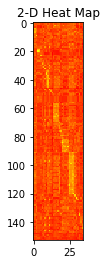

In [134]:
import numpy as np
import matplotlib.pyplot as plt
  
data = np.array(similars.values)
plt.imshow( data , cmap = 'autumn' , interpolation = 'nearest' )


  
plt.title( "2-D Heat Map" )
plt.show()

# Correct estoque

In [197]:
best_alternative.head()

,nome,melhor alternativa
0,ALCATRA C/QJO,ALCATRA COM QUEIJO
1,ANCHO MONTANA,ANCHO ALIMENTAR
2,ASSADO DE TIRAS,ASSADO DE TIRAS ARG
3,CARVÃO 10KG,CARVÃO 10 KG
4,CARVÃO 3KG,CARVÃO 10 KG


<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, ALCATRA C/QJO to TIBONE
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   estoque  45 non-null     float64
dtypes: float64(1)
memory usage: 720.0+ bytes
